# Итерационные методы для решения СЛАУ

## План

1. Двухслойные итерационные схемы
    - Метод Якоби
    - Метод Зейделя
    - Методы неполной релаксации
    - Сравнение двухслойных итерационных методов
2. Многослойные итерационные схемы
    - Чебышевское ускорение*
3. Сравнение итерационного метода Якоби и прямого метода Гаусса
4. Ускорение кода python с помощью numba

## Двухслойные итерационные схемы

Пусть решаем следующую СЛАУ:

$$
A x=f, \quad A \in \mathbb{R}^{n,n}, \quad x,f \in  \mathbb{R}^{n,1}
$$

До этого решали её _прямыми методами_ - т.е. находили алгоритмами, которые за заранее определенное количество шагов находил решение (тот же метод Гаусса).

Сейчас же хотим решать системку __итерационно__ - т.е. постепенно уточнять наше решение в зависимости от шага итерации. Останавливаемся при достижении определённой точности $\varepsilon$. 

Как правило, это гораздо более быстрый путь, если мы работаем с разряженными матрицами большой размерности. Самый простой способ реализации - зная текущее приближение (текущий слой), построить из него новое (следующий слой) - так называемая двухслойная схема.


>В общем виде __двухслойная итерационная схема__ выглядит следующим образом:

>$$
R_k \frac{x^{(k+1)}-x^{(k)}}{\tau^{(k)}}+A x^{(k)}=f
$$

>где $R_k \in \mathbb{R}^{n,n}, \tau^{(k)} \in \mathbb{R}$ - ненулевые параметры итерации. Матрицы $R_k$ должны быть невырожденные и положительно определённые.


Очевидно, что если последовательность  $x^{(k)}$ является сходящейся, то она сходится к решению исходной системы. При этом на каждом шаге мы всё равно обязаны решить систему относительно $x^{(k+1)}$ - это должно быть проще решения изначальной задачи.

Таким образом, коэффициенты итерации $R_k , \tau^{(k)}$ надо подбирать исходя из:

1. Сходимости последовательности $x^{(k)}$

2. Простоты решения задачи $R_k \cdot x^{(k+1)}=\tau^{(k)}f + \left(R_k \cdot x^{(k)} - A \tau^{(k)} \right) x^{(k)}$

Понятно, что по сути своей этот метод очень схож с методом простой итерации. За более подробным общим рассмотрением такой задачи смотреть [здеся](group0121.gorodok.net/mokan.pdf)  или большим количеством простых примеров и теоремок по приведенным методам [тута](https://onedrive.live.com/?authkey=%21AI%5FBxUIavdEebNg&cid=6B66B90A1F084CD8&id=6B66B90A1F084CD8%21724&parId=6B66B90A1F084CD8%21625&o=OneUp) 

Приведём некоторые примеры двухслойных итераций.

### Метод Якоби

Пусть имеем систему:

$$
A \vec{x}=\vec{b}
$$

Хотим привести его к итерационному виду:

$$
\vec{x}=B \vec{x}+\vec{g}
$$

Метод Якоби основан на отделении диагонали матрицы $A$ от других её элементов:

$$
A=(L+D+U)
$$

где мы разделили нашу матрицу на сумму нижнетреугольной, диагональной и верхнетреугольной. Подставляя в изначальное уравнение:

$$
D\vec{x}=-(L+U) \vec{x}+\vec{b}
$$

$$
\vec{x}=-D^{-1}(L+U) \vec{x}+D^{-1}\vec{b}
$$

Получили итерационный вид. Осталось навесить номера итерации и 

Тогда итерационная схема выглядит как:

$$
\vec{x}^{(k+1)}=B \vec{x}^{(k)}+\vec{g}
$$

$$
B=-D^{-1}(L+U), \quad \vec{g} = D^{-1}\vec{b}
$$

Или, в раскрытом виде:

>$$
x_i^{(k+1)}=\frac{1}{a_{i i}}\left(b_i-\sum_{j \neq i} a_{i j} x_j^{(k)}\right), \quad i=1,2, \ldots, n
$$

__Теорема 1.__ Критерий сходимости метода Якоби

Метод Якоби сходится тогда и только тогда, когда $\left|\lambda_i\right|<1$, где $\lambda_i$ - корни следующего уравнения:


$$
\operatorname{det}\left|\begin{array}{cccc}
\lambda a_{11} & a_{12} & \ldots & a_{1 n} \\
a_{21} & \lambda a_{22} & \ldots & a_{2 n} \\
\ldots & \ldots & \ldots & \ldots \\
a_{n 1} & a_{n 2} & \ldots & \lambda a_{n n}
\end{array}\right|=0
$$


__Теорема 2.__ Достаточное условие сходимости метода Якоби.
Пусть $\|B\|<1$. Тогда при любом выборе начального приближения $\vec{x}^{(0)}$ :

1. Метод сходится

2. Скорость сходимости метода равна скорости сходимости геометрической прогрессии со знаменателем $q=\|B\|$

3. Верна оценка погрешности: $\left\|\vec{x}^{(k)}-\vec{x}\right\|<q^k\left\|\vec{x}^{(0)}-\vec{x}\right\|$

__Теорема 3.__ Достаточное условие сходимости метода Якоби.
Метод Якоби сходится, если для матрицы изначального уравнения выполнено __условие диагонального преобладания__:

$$
\forall i  \to \left|a_{i i}\right| \geqslant \sum_{j \neq i}\left|a_{i j}\right|
$$

Притом хотя бы одно из неравенств должно быть строгим.

### Метод Зейделя

Пусть имеем систему:

$$
A \vec{x}=\vec{b}
$$

Хотим привести его к итерационному виду:

$$
\vec{x}=B \vec{x}+\vec{g}
$$

Опять разобъём матрицу $A$ на сумму нижнетреугольной, диагональной и верхнетреугольной:

$$
A=(L+D+U)
$$

И построим итерационную формулу из изначальной системы:

$$
(L+D) \vec{x}^{(k+1)}=-U \vec{x}^{(k)}+\vec{b}
$$

$$
 \vec{x}^{(k+1)}=-(L+D)^{-1}U \vec{x}^{(k)}+(L+D)^{-1}\vec{b}
$$

Метод Гаусса — Зейделя можно рассматривать как модификацию метода Якоби. Основная идея модификации состоит в том, что новые значения $\vec{x}^{(i)}$ используются здесь сразу же по мере получения, в то время как в методе Якоби они не используются до следующей итерации:

$$
\left\{\begin{array}{l}
x_1{ }^{(k+1)}=&c_{12} x_2^{(k)}&+&c_{13} x_3^{(k)}&+&\ldots&+&c_{1 n} x_n{ }^{(k)}&+&d_1 \\
x_2{ }^{(k+1)}=&c_{21} x_1^{(k+1)}&+&c_{23} x_3^{(k)}&+&\ldots&+&c_{2 n} x_n{ }^{(k)}&+&d_2 \\
\ldots \\
x_n{ }^{(k+1)}=&c_{n 1} x_1^{(k+1)}&+&c_{n 2} x_2^{(k+1)}&+&\ldots&+&c_{n(n-1)} x_{n-1}^{(k+1)}&+& d_n
\end{array}\right.
$$
где
$$
c_{i j}=\left\{\begin{array}{ll}
-\frac{a_{i j}}{a_{i i}}, & j \neq i, \\
0, & j=i .
\end{array} \quad d_i=\frac{b_i}{a_{i i}}, \quad i=1, \ldots, n\right.
$$

__Теорема 4.__ Критерий сходимости метода Зейделя

Метод Зейделя сходится тогда и только тогда, когда $\left|\lambda_i\right|<1$, где $\lambda_i$ - корни следующего уравнения:

$$
\operatorname{det}\left|\begin{array}{cccc}
\lambda a_{11} & a_{12} & \ldots & a_{1 n} \\
\lambda a_{21} & \lambda a_{22} & \ldots & a_{2 n} \\
\ldots & \ldots & \ldots & \ldots \\
\lambda a_{n 1} & \lambda a_{n 2} & \ldots & \lambda a_{n n}
\end{array}\right|=0
$$

__Теорема 5.__ Достаточное условие сходимости метода Зейделя.
Метод Зейделя сходится, если для матрицы изначального уравнения выполнено __условие диагонального преобладания__:

$$
\forall i  \to \left|a_{i i}\right| \geqslant \sum_{j \neq i}\left|a_{i j}\right|
$$

Притом хотя бы одно из неравенств должно быть строгим.

### Методы неполной релаксации

В целом, метод Зейделя работает лучше метода Якоби. Это наталкивает на мысль о том, что можно ещё чутка улучшить метод, особо не меняя сути. Помните параметр $\tau$ в общем определении двухслойной схемы? Сейчас он нам понадобится.

Пусть $z_i^{(k + 1)}$ - $i$-я компонента $k + 1$ приближения Зейделя. Пусть теперь следующую итерацию мы будем считать по формуле

$$x_i^{(k + 1)} = x_i^{(k)} + \omega (z_i^{(k + 1)} - x_i^{(k)})$$

При $\omega = 1$ получается метод Зейделя в чистом виде. Метод при $\omega \in(0, 1)$ называют __методом нижней релаксации__. Если $\omega \in(1, 2)$ - __методом верхней релаксации__. Переписав выражение, видим, что по сути мы "чутка оставляем" прошлый слой при построении следующего:

$$x_i^{(k + 1)} = (1 - \omega)x_i^{(k)} + \omega z_i^{(k +1 )}$$

Матричная запись данного метода выглядит как: 

$$(L + \omega D)\frac{x^{(k + 1)} - x^{(k)}}{\omega} + Ax^{(k)} = f$$

Откуда понятно, что параметр $\tau=\omega$ имеет релаксационный смысл (т.е. своей рода "консервативности" метода).

__Теорема 6.__:
Пусть матрица $A = A^* > 0$, тогда метод релаксации сходится $\forall\omega \in(0, 2)$.

При каких $\omega$ метод сходится быстрее? В общем случае на этот вопрос нет универсального ответа, однако математиками было рассмотрено много частных случаев.

Рассмотрим один важный класс задач, для которого найдена такая $\omega$.

Пусть $P$ - матрица смены базиса такая, что : $PAP^\top = \begin{bmatrix} D_1 & T_{12} \\ T_{21} & D_2 \end{bmatrix}$, где $D_i$ - диагональные матрицы. Т.е. "разделили переменные на два кластера".

Для таких задач найден оптимальный параметр релаксации 

$$\omega_{\text(опт)} = \frac{1}{1 + \sqrt{(1 - \rho^2(B))}}$$

Тут $B$ - матрица перехода Якоби итерационного метода ($\rho(B)$ - спектральный радиус, то есть наибольшее по модулю собственное число) в итерационном уравнении вида:
$$
\begin{gathered}
\vec{x}=B \vec{x}+\vec{g} 
\end{gathered}
$$

### Сравнение двухслойных итерационных методов

Сравним скорости сходимости для конкретной системы:

$$
\left\{\begin{array}{l}
2 x_{1}+x_{2}=1 \\
x_{1}+2 x_{2}=-1
\end{array}\right.
$$
Точное решение системы имеет вид:
$$
\vec{x}^{*}=\left(\begin{array}{c}
1 \\
-1
\end{array}\right)
$$
Решим систему уравнений методами Якоби, Зейделя и ПВР.
Тогда для метода Якоби получим:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=-0.5 x_{2}^{(s)}+0.5 \\
x_{2}^{(s+1)}=-0.5 x_{1}^{(s)}-0.5
\end{array}\right.
$$
Для метода Зейделя:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=-0.5 x_{2}^{(s)}+0.5 \\
x_{2}^{(s+1)}=-0.5 x_{1}^{(s+1)}-0.5
\end{array}\right.
$$
Для метода ПВР:
$$
\left\{\begin{array}{l}
x_{1}^{(s+1)}=(1-\omega) x_{1}^{(s)}+\omega\left(-0.5 x_{2}^{(s)}+0.5\right) \\
x_{2}^{(s+1)}=(1-\omega) x_{2}^{(s)}+\omega\left(-0.5 x_{1}^{(s+1)}-0.5\right)
\end{array}\right.
$$
где значение параметра было выбрано $\omega=1.1$.

Для каждого метода рассмотрим три итерации. Тогда получим следующие значения:

$$
\begin{array}{|c|c|c|c|}
\hline & x_1^{(3)} & x_2^{(3)} & \left\|\vec{x}^{(3)}-\vec{x}^*\right\| \\
\hline \text { Якоби } & 0.875 & -0.875 & 0.125 \\
\hline \text { Зейдель } & 0.969 & -0.984 & 0.031 \\
\hline \text { ПВР } & 1.0008 & -1.0009 & <0.0001 \\
\hline
\end{array}
$$

Из таблицы видно, что метод ПВР сходится быстрее, чем методы Якоби и Зейделя. Вспомним, что для системы, в которой переменные можно разделить на два класса так, чтобы каждое уравнение связывало элемент одного класса с элементами другого, можно найти оптимальное значение параметра $\omega_{\text {опт }}$. Для систем уравнений с двумя переменными такое разделение выполняется всегда. Таким образом, при условии сходимости метода Якоби для системы второго порядка всегда можно найти оптимальное значение параметра.

Рассмотрим, чему равен спектральный радиус матрицы перехода для метода Якоби.
$$
\begin{gathered}
\vec{x}=R \vec{x}+\vec{F} \\
R_{\text {Якоби }}=\left(\begin{array}{cc}
0 & -0.5 \\
-0.5 & 0
\end{array}\right) \\
\lambda\left(R_{\text {Якоби }}\right)=\pm \frac{1}{2}, \quad \Rightarrow \quad \rho\left(R_{\text {Якоби }}\right)=\frac{1}{2}
\end{gathered}
$$
Тогда для метода ПВР получим:
$$
\omega_{\text {опт }}=\frac{2}{1-\sqrt{1-\left(\frac{1}{2}\right)^{2}}} \approx 1.07
$$
Именно поэтому значение $\omega$ было выбрано равным $1.1 .$

## Многослойные итерационные схемы

Рассмотрим СЛАУ:

$$Ax = f$$

Пусть СЛАУ привели к виду: 

$$x = Bx + g$$

Рассмотрим метод простых итераций, который сходится к точному решению:

$$x^{(k+1)} = Bx^{(k)} + g$$

$$x^{(k)} \rightarrow x^{(*)}$$

Рассмотрим известную последовательность приближений $x^{(0)}, x^{(1)}, x^{(2)} ... x^{(m)}$. На основе данной последовательности построим новое приближение:

$$y_m = \sum\limits_{i = 0}^{m}\gamma_{im}x^{(i)}$$

Если $x^{(0)} = x^{(1)} = x^{(2)} = ... = x^{(m)} = x^{(*)}$, т.е. уже сидим в решении и никуда из него не уходим. Тогда необходимое условие того, чтобы эта взвешенная сумма давала нам правильный ответ - единичная нормировка весов слагаемых:

$$\sum\limits_{i = 0}^{m}\gamma_{im} = 1$$

Такой процедурой можно уточнять решения и строить многослойные схемы.

Рассмотрим __невязку__ такой процедуры : 

$$\begin{cases}
x^{(m)} = Bx^{(m-1)} + g \\
x^{(*)} = Bx^{(*)} + g \\
\end{cases}$$

Тогда невязка решения будет: 


$$\widetilde\delta = y_m - x^{(*)} = \sum\limits_{i = 0}^{m}\gamma_{im}x^{(i)} - x^{(*)} = \sum\limits_{i = 1}^{m}\gamma_{im}(x^{(i)} - x^{(*)}) = \sum\limits_{i = 1}^{m}\gamma_{im}(Bx^{(m-1)} - Bx^{(*)}) = P_m(B)(x^{(0)} - x^{(*)})$$

где $P_m(B) = \sum\limits_{i = 1}^{m}\gamma_{im}B^i$.

### Чебышевское ускорение*

__Многочлены Чебышева.__

Многочленами Чебышева называют:

$$T_{n + 1}(x) = 2xT_{n}(x) - T_(n - 1)(x)$$

$$T_0(x) = 1 , T_1(x) = x$$

Все многочлены определены на отрезке $[-1; 1]$ и для всех выполняется $max(|T_n|)=1$.

Среди всех многочленов, значения которых на отрезке [-1,1] не превосходят по модулю 1, многочлен Чебышёва имеет наибольший старший коэффициент, наибольшее значение в любой точке за пределами этого отрезка, а нули многочлена Чебышева являются оптимальными узлами во многих вычислительных схемах.

__Приведенным многочленом Чебышева__ назовем $\overline T_n(x) = 2^{1 - n}T_n(x)$.

Рассмотрим многочлены вида:

$$P_m(x) = \frac{T_m(\frac{x}{\rho})}{T_m(\frac{1}{\rho})}$$

Для такого многочлена выполняется :
* Он определен от $-\rho$ до $\rho$
* $P_m(1) = 1$

Рассмотрим $\rho = 1 + \varepsilon$, тогда :

$$P_m(x)\leq \frac{1}{T_m(1 + \varepsilon)}$$

$$P_m(x) = \frac{1}{T_m(\frac{1}{\rho})}T_m(\frac{x}{\rho})$$

Обозначим $\mu_m = \frac{1}{T_m(\frac{1}{\rho})}$, тогда 

$$\mu_m = \frac{2}{\rho\mu_{m-1}} - \frac{1}{\mu_{m-2}}$$

Рассмотрим, как поменяется решение :

$$y_m - x^* = P_m(B)\left(x^{(0)} - x^*\right) = \mu_mT_m\left(\frac{B}{\rho}\right)(x^{(0)} - x^*) = \mu_m \left(\frac{2}{\rho}B\left(x^{(m - 1)} - x^*\right)\frac{1}{\mu_{m-1}} - \left(x^{(m - 2)} - x^*\right)\frac{1}{\mu_{m-2}} \right)$$

Приведем выражение к виду: 

$$y_m = \frac{2\mu_m}{\mu_{m-1}}\frac{B}{\rho}x^{(m-1)} - \frac{\mu_m}{\mu_{m-2}}x^{(m-2)} + dm$$

, где $dm = x^*\left(1 -  \frac{2\mu_m}{\mu_{m-1}}\frac{B}{\rho} + \frac{\mu_m}{\mu_{m-2}}\right)$

Для $x^*$ выполняется уравнение $x^* = Bx^* + g$, откуда $Bx^* = x^* - g$, тогда:

$dm = \mu_m \left(\frac{1}{\mu_m} - \frac{2}{\rho\mu_{m-1}} - \frac{1}{\mu_{m-2}} \right)x^* + 2\frac{\mu_m}{\mu_{m -1 }}g$

В силу ранее полученных выражений первая скобка равна 0.

В итоге получаем итерационный процесс :

$$\begin{cases}
\mu_0 = 1, \mu_1 = \rho \\
y_0 = x^{(0)}, \; y_1 = Bx^{(0)} + g \\
\mu_m = (\frac{2}{\rho\mu_{m - 1 }} - \frac{1}{\mu_{m-2}})^{-1} \\
y_m = \frac{2\mu_m}{\rho\mu_{m-1}}By_{m-1} - \frac{\mu_m}{\mu_{m-2}}By_{m-2} + \frac{2\mu_m}{\rho\mu_{m-2}}g
\end{cases}$$

В данном ускорении используются все предыдущие вычисления, но в итоговой формуле остались только 2 предыдущих шага. Т.е., данный алгоритм является трехслойным.

## Сравнение итерационного метода Якоби и прямого метода Гаусса

### Решаемая система

Будем решать систему

$$
Ax=f
$$

где

$$
\begin{array}{cl}
a_{i i}=2, & a_{i, i+1}=-1-\alpha, \quad a_{i, i-1}=-1+\alpha \\
f_1=1-\alpha, & f_i=0, \quad i=2,3, \ldots, n-1, \quad f_n=1+\alpha
\end{array}
$$

Составим функцию, возвращающую нам матрицу A и столбец f по заданному n и alpha.

In [1]:
import numpy as np

def system(n: int, alpha: float):
    
    A = np.zeros((n, n))
    f = np.zeros((n, 1))
    
    
    for i in range(n):
        A[i,i] = 2.
        if i > 0:
            A[i,i-1] = -1 + alpha
        if i < n - 1:
            A[i,i+1] = -1 - alpha
            
    f = np.zeros(n) 
    f[0] = 1 - alpha
    f[n-1] = 1 + alpha
    
    return (A, f)
    
system(4, 1)

(array([[ 2., -2.,  0.,  0.],
        [ 0.,  2., -2.,  0.],
        [ 0.,  0.,  2., -2.],
        [ 0.,  0.,  0.,  2.]]),
 array([0., 0., 0., 2.]))

### Реализуем метод решения этой системы прямым методом Гаусса

In [2]:
def gauss_solve(A,f):
    
    x = np.copy(f)
    
    n = len(f)
    # Elimination phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k] != 0.0:
                #if not null define λ
                lam = A[i,k]/A[k,k]
                #we calculate the new row of the matrix
                A[i,k+1:n] = A[i,k+1:n] - lam*A[k,k+1:n]
                #we update vector b
                x[i] = x[i] - lam*x[k]
                # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (x[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]
    
    return x

A, f = system(4, 1)

gauss_solve(A, f)

array([1., 1., 1., 1.])

In [3]:
# Магия питона - мотайте на ус
gauss_solve(*system(4, 1))

array([1., 1., 1., 1.])

In [4]:
A @ gauss_solve(A, f) - f

array([0., 0., 0., 0.])

### Реализуем метод Якоби

$$
x_i^{(k+1)}=\frac{1}{a_{i i}}\left(f_i-\sum_{j \neq i} a_{i j} x_j^{(k)}\right), \quad i=1,2, \ldots, n
$$

In [5]:
def jacobi_solve(A, f, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    
    if x_prev == None: 
        x_prev = np.ones(f.shape)*2 # нулевое начальное приближение - плохо!
    x_curr = np.copy(x_prev)
    
    k = 0
    
    for k in range(1, MAX_ITER + 1):
        
        x_prev[:] = x_curr[:] # Это важно, да
        
        for i in range(n):
            x_curr[i] = 1./A[i, i]*(f[i] - A[i, 0:i] @ x_prev[0:i] - A[i, i+1:] @ x_prev[i+1:])
        
        if np.sum((x_curr - x_prev)**2) < eps**2:
            break
        

    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    
    return x_curr

In [6]:
jacobi_solve(*system(4, 1))

array([1., 1., 1., 1.])

### Сравнение

Необходимо построить 3 графика для трёх разных alpha (маленького, небольшого, очень большого), на каждом мз которых будут кривые времени выполнения для каждого алгоритма в зависимости от n.

Сначала реализуем функцию, которая по заданному alpha, диапазону n и __заданной функции__  будет выдавать нам список с временами выволнения

In [7]:
import time
def series_timed(alpha, ns, func):
    
    Ts = []
    
    for n in ns:
        
        A, f = system(n, alpha)
        
        start = time.time()
        _ = func(A, f)
        seconds = time.time() - start
        
        Ts.append(seconds)
        
    return Ts

In [8]:
series_timed(0.5, [1, 2, 3, 200], jacobi_solve)

[0.0, 0.0, 0.000995635986328125, 0.3859994411468506]

Теперь построим графики сравнения

0
1
2
CPU times: total: 44 s
Wall time: 44.2 s


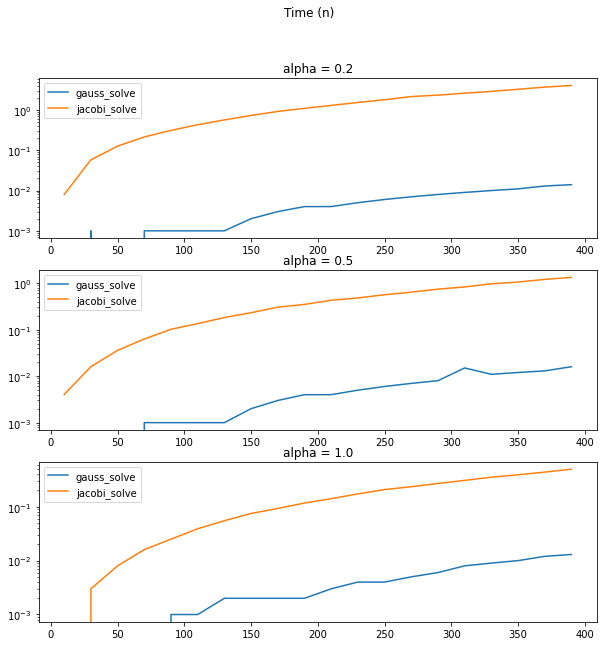

In [9]:
%%time
import matplotlib.pyplot as plt

alphas = [0.2, 0.5, 1.]
ns = np.arange(10, 400, 20)
funcs = [gauss_solve, jacobi_solve]

fig, axs = plt.subplots(len(alphas))
fig.set_size_inches(10, 10)
fig.suptitle('Time (n)')

for i, alpha in enumerate(alphas):
    print(i)
    
    for func in funcs:
        axs[i].semilogy(ns, series_timed(alpha, ns, func), label = func.__name__)
    
    axs[i].title.set_text(f"alpha = {alpha}")
    axs[i].legend()

### Ускорение кода python с помощью numba

Даже используя numpy питоновский код на порядки медленее c или c++. Есть ли способ ускорить код? Оказывается - библиотека __numba__.

Эта библиотека позволяет с минимальными усилиями достингуть скорости работы c++ с помощью just in time компиляции питоновского кода в сишный. Поддерживает большинство функций numpy, но не все. Также может многое распараллелить за нас для ещё бОльшего ускорения! Однако многие фишки питона не поддерживаются или работают очень медленно (добавление элемента в список и т.д.).

Для пользования совет - стараться писать в сишном стиле без питоновских наворотов. 

In [10]:
#!pip install numba
from numba import njit, objmode, prange

@njit()
def system_numba(n: int, alpha: float):
    
    A = np.zeros((n, n))
    f = np.zeros((n, 1))
    
    
    for i in range(n):
        A[i,i] = 2.
        if i > 0:
            A[i,i-1] = -1 + alpha
        if i < n - 1:
            A[i,i+1] = -1 - alpha
            
    f = np.zeros(n) 
    f[0] = 1 - alpha
    f[n-1] = 1 + alpha
    
    return (A, f)

@njit()
def gauss_solve_numba(A,f):
    
    x = np.copy(f)
    
    n = len(f)
    # Elimination phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k] != 0.0:
                #if not null define λ
                lam = A[i,k]/A[k,k]
                #we calculate the new row of the matrix
                A[i,k+1:n] = A[i,k+1:n] - lam*A[k,k+1:n]
                #we update vector b
                x[i] = x[i] - lam*x[k]
                # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (x[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]
    return x

@njit()
def jacobi_solve_numba(A, f, eps = 1e-6, MAX_ITER = 100000, x_prev = None):
    
    n = f.shape[0]
    if x_prev == None: 
        x_prev = np.ones(f.shape)*2 # нулевое начальное приближение - плохо!
    x_curr = np.copy(x_prev)
    k = 0
    for k in range(1, MAX_ITER + 1):
        x_prev[:] = x_curr[:] # Это важно, да
        
        for i in range(n):
            x_curr[i] = 1./A[i, i]*(f[i] - A[i, 0:i] @ x_prev[0:i] - A[i, i+1:] @ x_prev[i+1:])
        if np.sum((x_curr - x_prev)**2) < eps**2:
            break
    if k == MAX_ITER:
        print("Didn't converge!Q!11!!1")
    return x_curr

@njit(parallel=True)
def series_timed_numba(alpha, ns, func):
    
    Ts = np.zeros(ns.shape)
    
    for i in prange(len(ns)): # только числовые циклы, prange для распараллеливания НЕЗАВИСИМЫХ циклов 
                              # (т.е. шаг цикла не должен опираться на вычисления с предыдущих шагов)
        
        A, f = system_numba(ns[i], alpha)
        
        
        with objmode(start='f8'):
            start = time.perf_counter()
            
        _ = func(A, f)
        
        with objmode(seconds='f8'):
            seconds = time.perf_counter() - start
        
        Ts[i] = seconds # Убрал append
        
    return Ts

0
1
2
CPU times: total: 4.02 s
Wall time: 652 ms


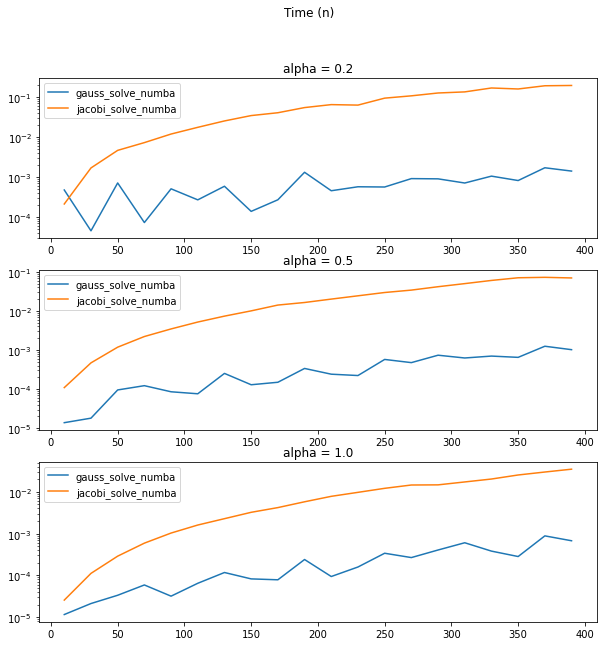

In [17]:
%%time

alphas = [0.2, 0.5, 1.]
ns = np.arange(10, 400, 20)
funcs = [gauss_solve_numba, jacobi_solve_numba]

fig, axs = plt.subplots(len(alphas))
fig.set_size_inches(10, 10)
fig.suptitle('Time (n)')

for i, alpha in enumerate(alphas):
    print(i)
    
    for func in funcs:
        axs[i].semilogy(ns, series_timed_numba(alpha, ns, func), label = func.__name__)
    
    axs[i].title.set_text(f"alpha = {alpha}")
    axs[i].legend()

Видим ускорение кода в ~70 раз путём изменения пары строчек! Без parallel = True и prange ускорение было бы в 26 раз со второго запуска - т.е. распараллеливание ускорило код ещё в 3 раза.

Стоит помнить, что при первои вызове функция может работать даже дольше, чем обычная питоновская, потому что происходит компиляция. Все последующие вызовы уже будут ускорены.

Попробуем рассмотреть более большие диапазоны n.

0
1
2
CPU times: total: 3min 55s
Wall time: 1min 1s


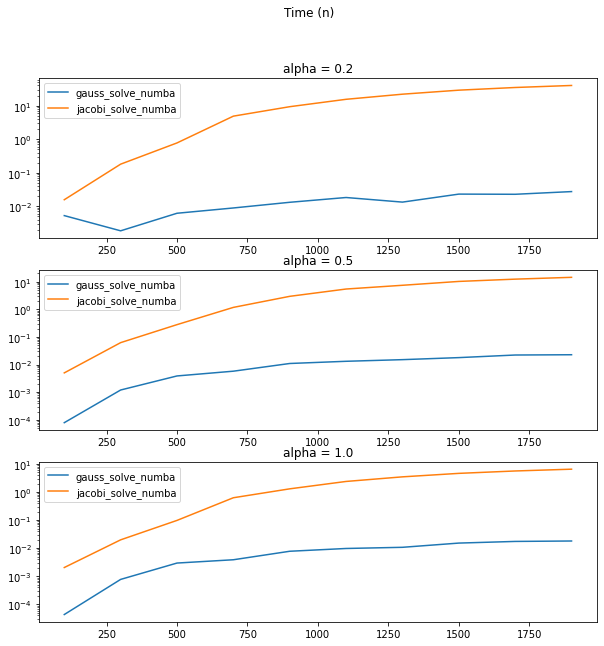

In [16]:
%%time

alphas = [0.2, 0.5, 1.]
ns = np.arange(100, 2000, 200)
funcs = [gauss_solve_numba, jacobi_solve_numba]

fig, axs = plt.subplots(len(alphas))
fig.set_size_inches(10, 10)
fig.suptitle('Time (n)')

for i, alpha in enumerate(alphas):
    print(i)
    
    for func in funcs:
        axs[i].semilogy(ns, series_timed_numba(alpha, ns, func), label = func.__name__)
    
    axs[i].title.set_text(f"alpha = {alpha}")
    axs[i].legend()

За другими примерами использования numbda гугл в помощь.